##### Load libs:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [3]:
data_num_day = pd.io.sql.read_sql(
	"SELECT "
		"uid, " \
		"CAST(strftime('%w', timestamp) AS INT) AS num_day " \
	"FROM checker " \
	"WHERE uid LIKE 'user_%' ",
	connect
)
day_mapping = {
    0: 'Sun',
    1: 'Mon', 
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}
data_num_day['num_day']=data_num_day['num_day'].map(day_mapping)
data_num_day

,uid,num_day
0,user_4,Fri
1,user_4,Fri
2,user_4,Fri
3,user_4,Fri
4,user_4,Fri
...,...,...
3202,user_1,Thu
3203,user_1,Thu
3204,user_1,Thu
3205,user_1,Thu


In [4]:
data_hour=pd.io.sql.read_sql(
	"SELECT " \
		"uid, " \
		"CAST(strftime('%H', timestamp) AS INT) AS hour " \
	"FROM checker " \
	"WHERE uid LIKE 'user_%' ",
	connect
)

data_hour

,uid,hour
0,user_4,5
1,user_4,5
2,user_4,5
3,user_4,5
4,user_4,5
...,...,...
3202,user_1,20
3203,user_1,20
3204,user_1,20
3205,user_1,20


##### 3.Heatmap:

In [10]:
pivot_num_day = data_num_day.pivot_table(
    index='num_day',
    columns='uid',
    aggfunc='size',
    fill_value=0
)
weekdays=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_num_day=pivot_num_day.reindex(weekdays)
pivot_num_day


uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
num_day,,,,,,,,,,,,,,,,,,,,,
Mon,3,0,0,0,2,3,50,0,10,8,...,0,0,9,46,2,5,35,1,0,0
Tue,0,0,16,0,1,57,87,0,5,4,...,0,7,26,11,3,0,86,0,5,0
Wed,0,1,37,0,0,0,0,0,0,1,...,0,44,32,0,1,0,33,4,3,0
Thu,0,39,77,0,7,4,17,5,14,17,...,15,12,25,7,20,7,108,2,0,15
Fri,0,0,1,0,0,0,0,0,0,0,...,0,7,1,59,3,35,61,0,0,0
Sat,0,1,4,0,7,28,79,4,0,32,...,0,12,2,3,22,90,0,2,0,46
Sun,0,43,2,8,76,23,26,20,31,0,...,27,32,26,8,21,7,45,9,0,26


In [11]:
pivot_hour = data_hour.pivot_table(
    index='hour',
    columns='uid',
    aggfunc='size',
    fill_value=0
)
pivot_hour = pivot_hour.reindex(range(24), fill_value=0)
pivot_hour=pivot_hour[[pair[1] for pair in sorted([[pivot_hour[col].sum(),col] for col in pivot_hour.columns], reverse=True)]]
pivot_num_day=pivot_num_day[[pair[1] for pair in sorted([[pivot_num_day[col].sum(),col] for col in pivot_num_day.columns], reverse=True)]]
pivot_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,1,0,0,1,0


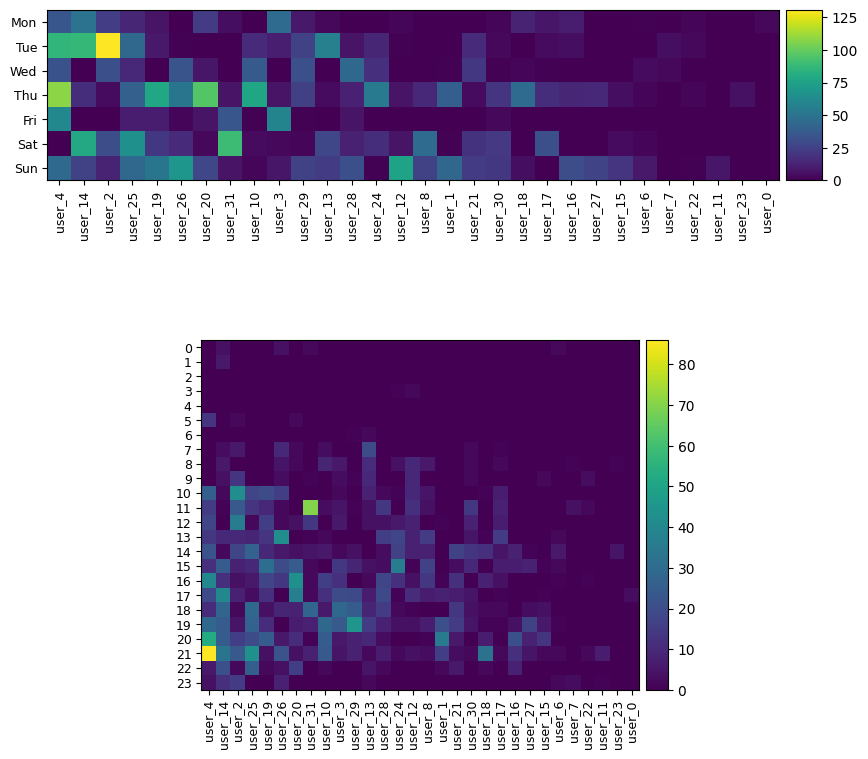

In [12]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

im1 = ax[0].imshow(pivot_num_day)
ax[0].set_xticks(range(len(pivot_num_day.columns.to_list())), labels = pivot_num_day.columns.to_list(), rotation = 90, fontsize=9)
ax[0].set_yticks(range(len(pivot_num_day.index.to_list())), labels = pivot_num_day.index.to_list(), fontsize = 9)
fig.colorbar(im1, cax=make_axes_locatable(ax[0]).append_axes("right", size="5%", pad=0.07))

im2 = ax[1].imshow(pivot_hour)
ax[1].set_xticks(range(len(pivot_hour.columns.to_list())), labels = pivot_hour.columns.to_list(), rotation = 90, fontsize=9)
ax[1].set_yticks(range(len(pivot_hour.index.to_list())), labels = pivot_hour.index.to_list(), fontsize = 9)
fig.colorbar(im2, cax=make_axes_locatable(ax[1]).append_axes("right", size="5%", pad=0.07))

plt.show()

##### 4.Questions:

Какой пользователь имеет больше всего коммитов во вторник?<br>Ответ: user_2

Какой пользователь имеет больше всего коммитов в Чт?<br>Ответ:user_4

В какой день недели пользователи не любят делать много коммитов?<br>Ответ: Fri

Какой пользователь в какой час сделал наибольшее количество коммитов?<br>Ответ: user_4,21

##### 5.Close connect:

In [29]:
connect.close()